In [1]:
#importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
# Read the data
df = pd.read_csv('dataset.csv')

In [3]:
# Test data read successfully by printing first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check for the columns in the data
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'StreamingService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
StreamingService     object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### From above we see that Variable TotalCharges is of the dtype: object instead of float64. We will convert it back to float by coercing

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

### Let us check by coercing if we got any null values

In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
StreamingService     0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### As we can see, we got about 11 null rows for the variable TotalCharges let us explore why it happend

In [8]:
df[df['TotalCharges'].isna()][['MonthlyCharges','tenure']]

,MonthlyCharges,tenure
488,52.55,0
753,20.25,0
936,80.85,0
1082,25.75,0
1340,56.05,0
3331,19.85,0
3826,25.35,0
4380,20.00,0
5218,19.70,0
6670,73.35,0


### We notice that these values were missing because the tenure was 0. As TotalCharges ~ MonthlyCharges*Tenure thus we can't even impute it. So, we will go ahead and drop these NA values.

In [9]:
df.dropna(inplace=True)

### Now we have another variable to deal with, 'customerID' as this is a unique identifier of each customer of TalkTel, we will make it as index of our dataframe

In [10]:
df.set_index(df['customerID'],inplace=True)
df.drop('customerID',axis=1,inplace=True)

### Let us now explore each of the Categorical and Binomial variables

In [11]:
df_categorical_columns = df.select_dtypes(include=object)

In [12]:
df_categorical_columns.nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
StreamingService    3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

### From above we see that:
 - Gender, Partner, Dependents, PhoneService, PaperlessBilling and Churn and Binomial
 - MultipleLines, InternetService,StreamingService, Contract, PaymentMethod are categorical(more than 2 unique values) 

### We will uses Pandas get_dummies() module to get one-hot encoded form of these non-numeric variables but we will first convert our target variable Churn to binomial numeric values

In [13]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
9237-HQITU,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

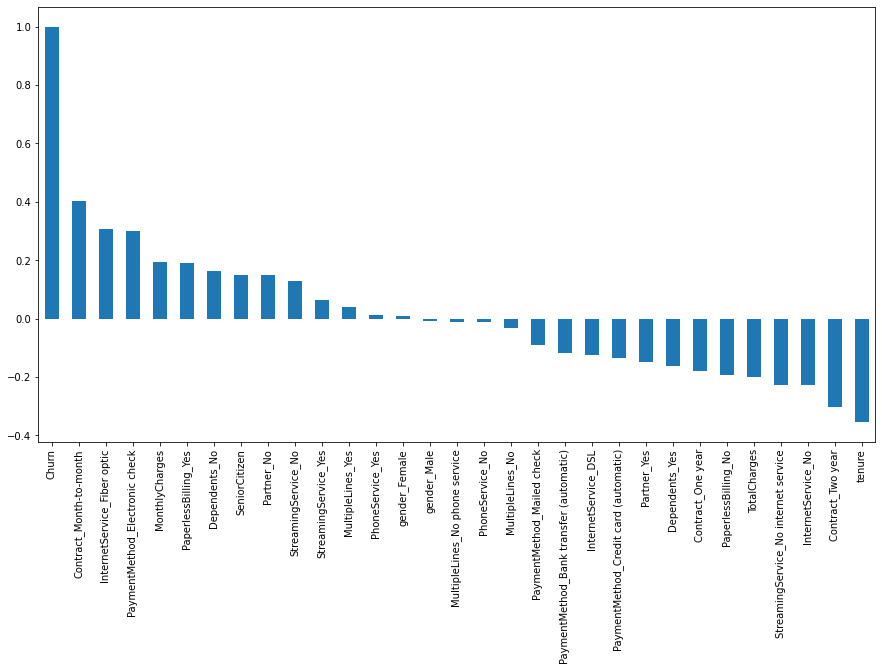

In [14]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month-to-Month Contract, Fiber Optic Internet Service, Electronic check payment method, Monthly charges, Paperless billing, No Dependents, Senior Citizens, No Partners, Streaming service and Multiple lines are positively correlated

Where as, tenure, two year contract, no internet service, total charges, no paperless billing, one year contract, having dependents, having partners are all negatively correlated

# Exploring the Data

### We will begin with our target variable 'Churn' and see how many instances of each class is present in our data

([<matplotlib.patches.Wedge at 0x7f0bd5593a60>,
 [Text(-0.7383051242403968, 0.8154174044747711, 'No Churn'),
  Text(0.7383051242403964, -0.8154174044747714, 'Churn')],
 [Text(-0.40271188594930735, 0.44477312971351146, '73.42%'),
  Text(0.40271188594930707, -0.44477312971351163, '26.58%')])

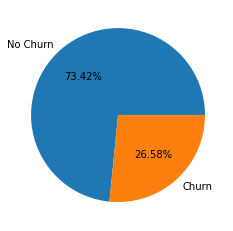

In [15]:
plt.pie(df['Churn'].value_counts(),labels =['No Churn','Churn'],autopct='%1.2f%%')

### We notice that about 73% of the customers are loyal and 27% of customers churn

### Now let us look demographic wise distribution

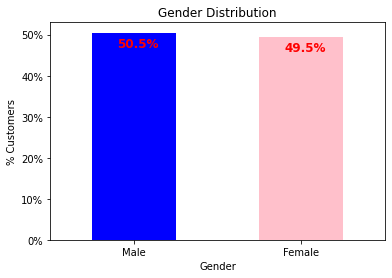

In [16]:
colors = ['#0000FF','#FFC0CB']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='red',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

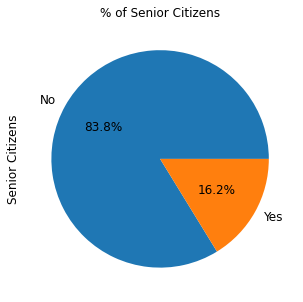

In [17]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

### We see only ~16% of TalkTel customers are senior citizens so most of TalkTel customers are young

### Let us explore other categorical columns: tenure, contract, paperlessbilling, payment method

/home/rajveldur/MTech/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

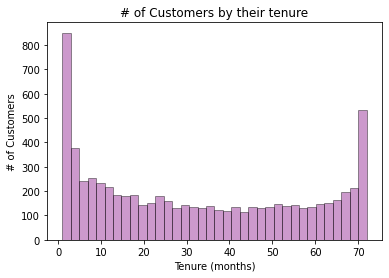

In [18]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 7})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

### From the above plot we notice that more customers left the service within a month and quiet some people have stayed back for ~72 months, these customers are loyal to TalkTel.

### Contract:

Text(0.5, 1.0, '# of Customers by Contract Type')

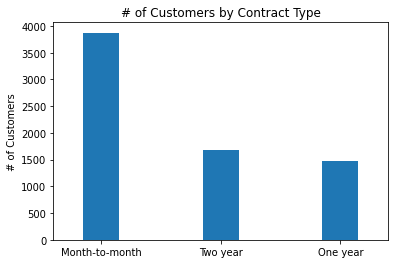

In [19]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

### We notice there are more numbr of customers on a month-on-month billing cycle and about equal number of customers on annual and bi-annual billing cycle

### No we will see distribution of customers across multiple services provided by TalkTel

In [20]:
df_categorical = df.select_dtypes(include=object)

In [21]:
df_services = df_categorical[['PhoneService','MultipleLines','InternetService','StreamingService']]

In [22]:
df_services.columns

Index(['PhoneService', 'MultipleLines', 'InternetService', 'StreamingService'], dtype='object')

<AxesSubplot:>

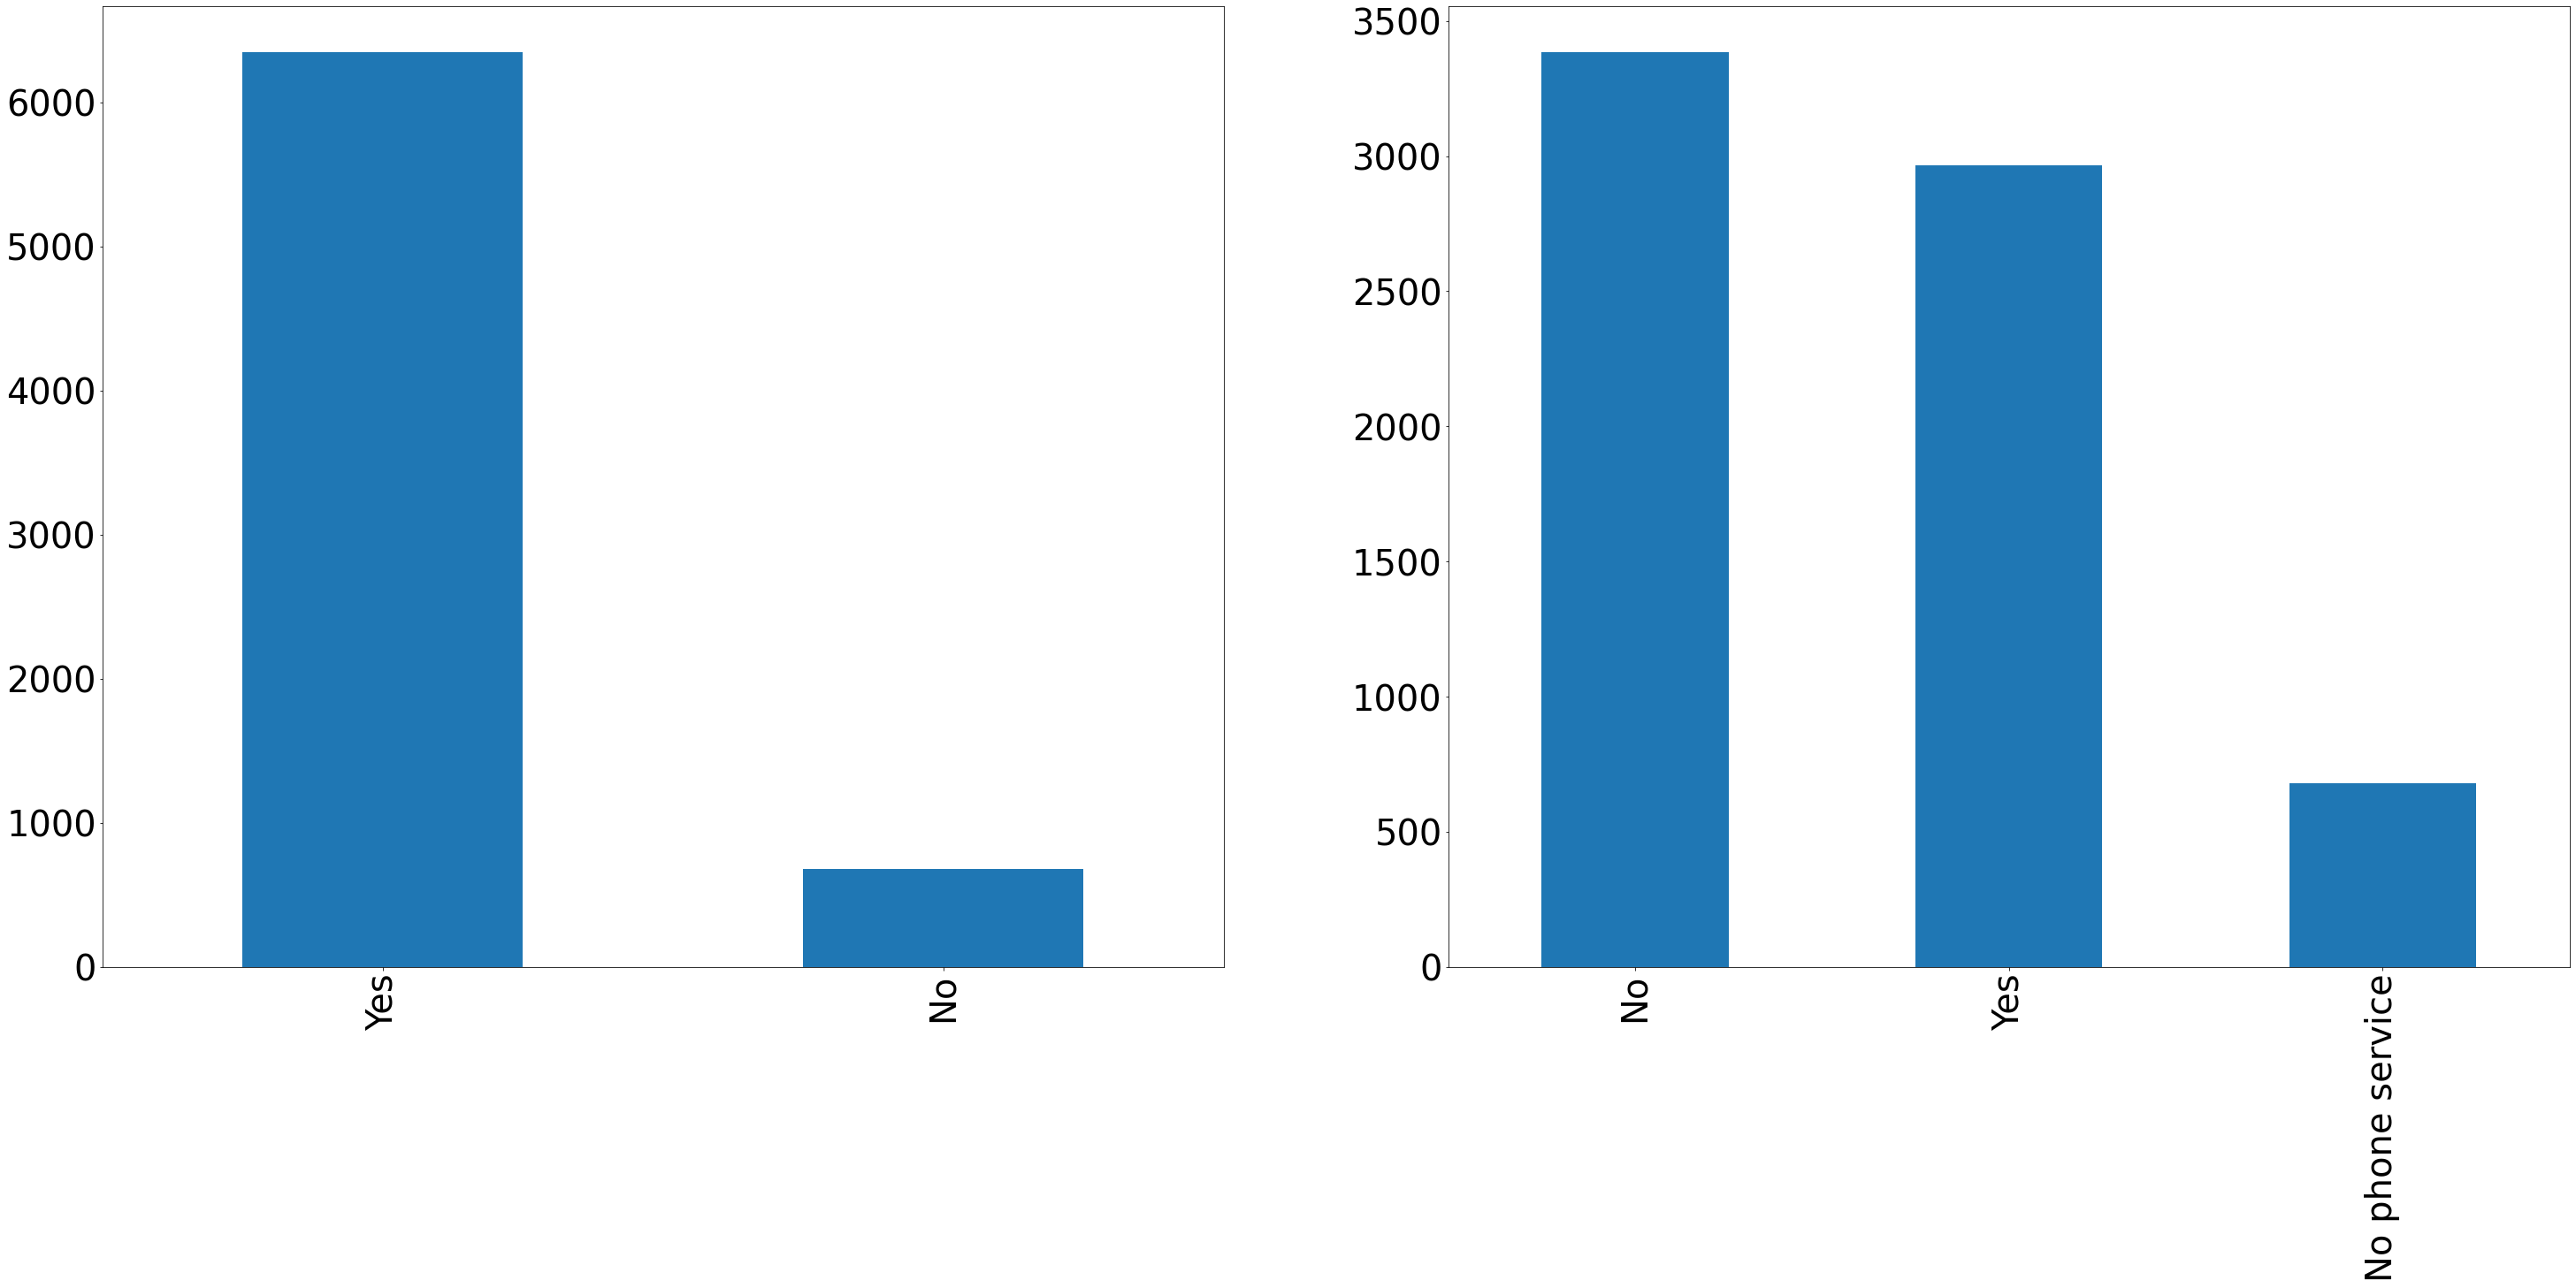

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df_services['PhoneService'].value_counts().plot(kind='bar',fontsize=40, ax=ax1, figsize=(50,20))
df_services['MultipleLines'].value_counts().plot(kind='bar',fontsize=40, ax=ax2, figsize=(50,20))

<AxesSubplot:>

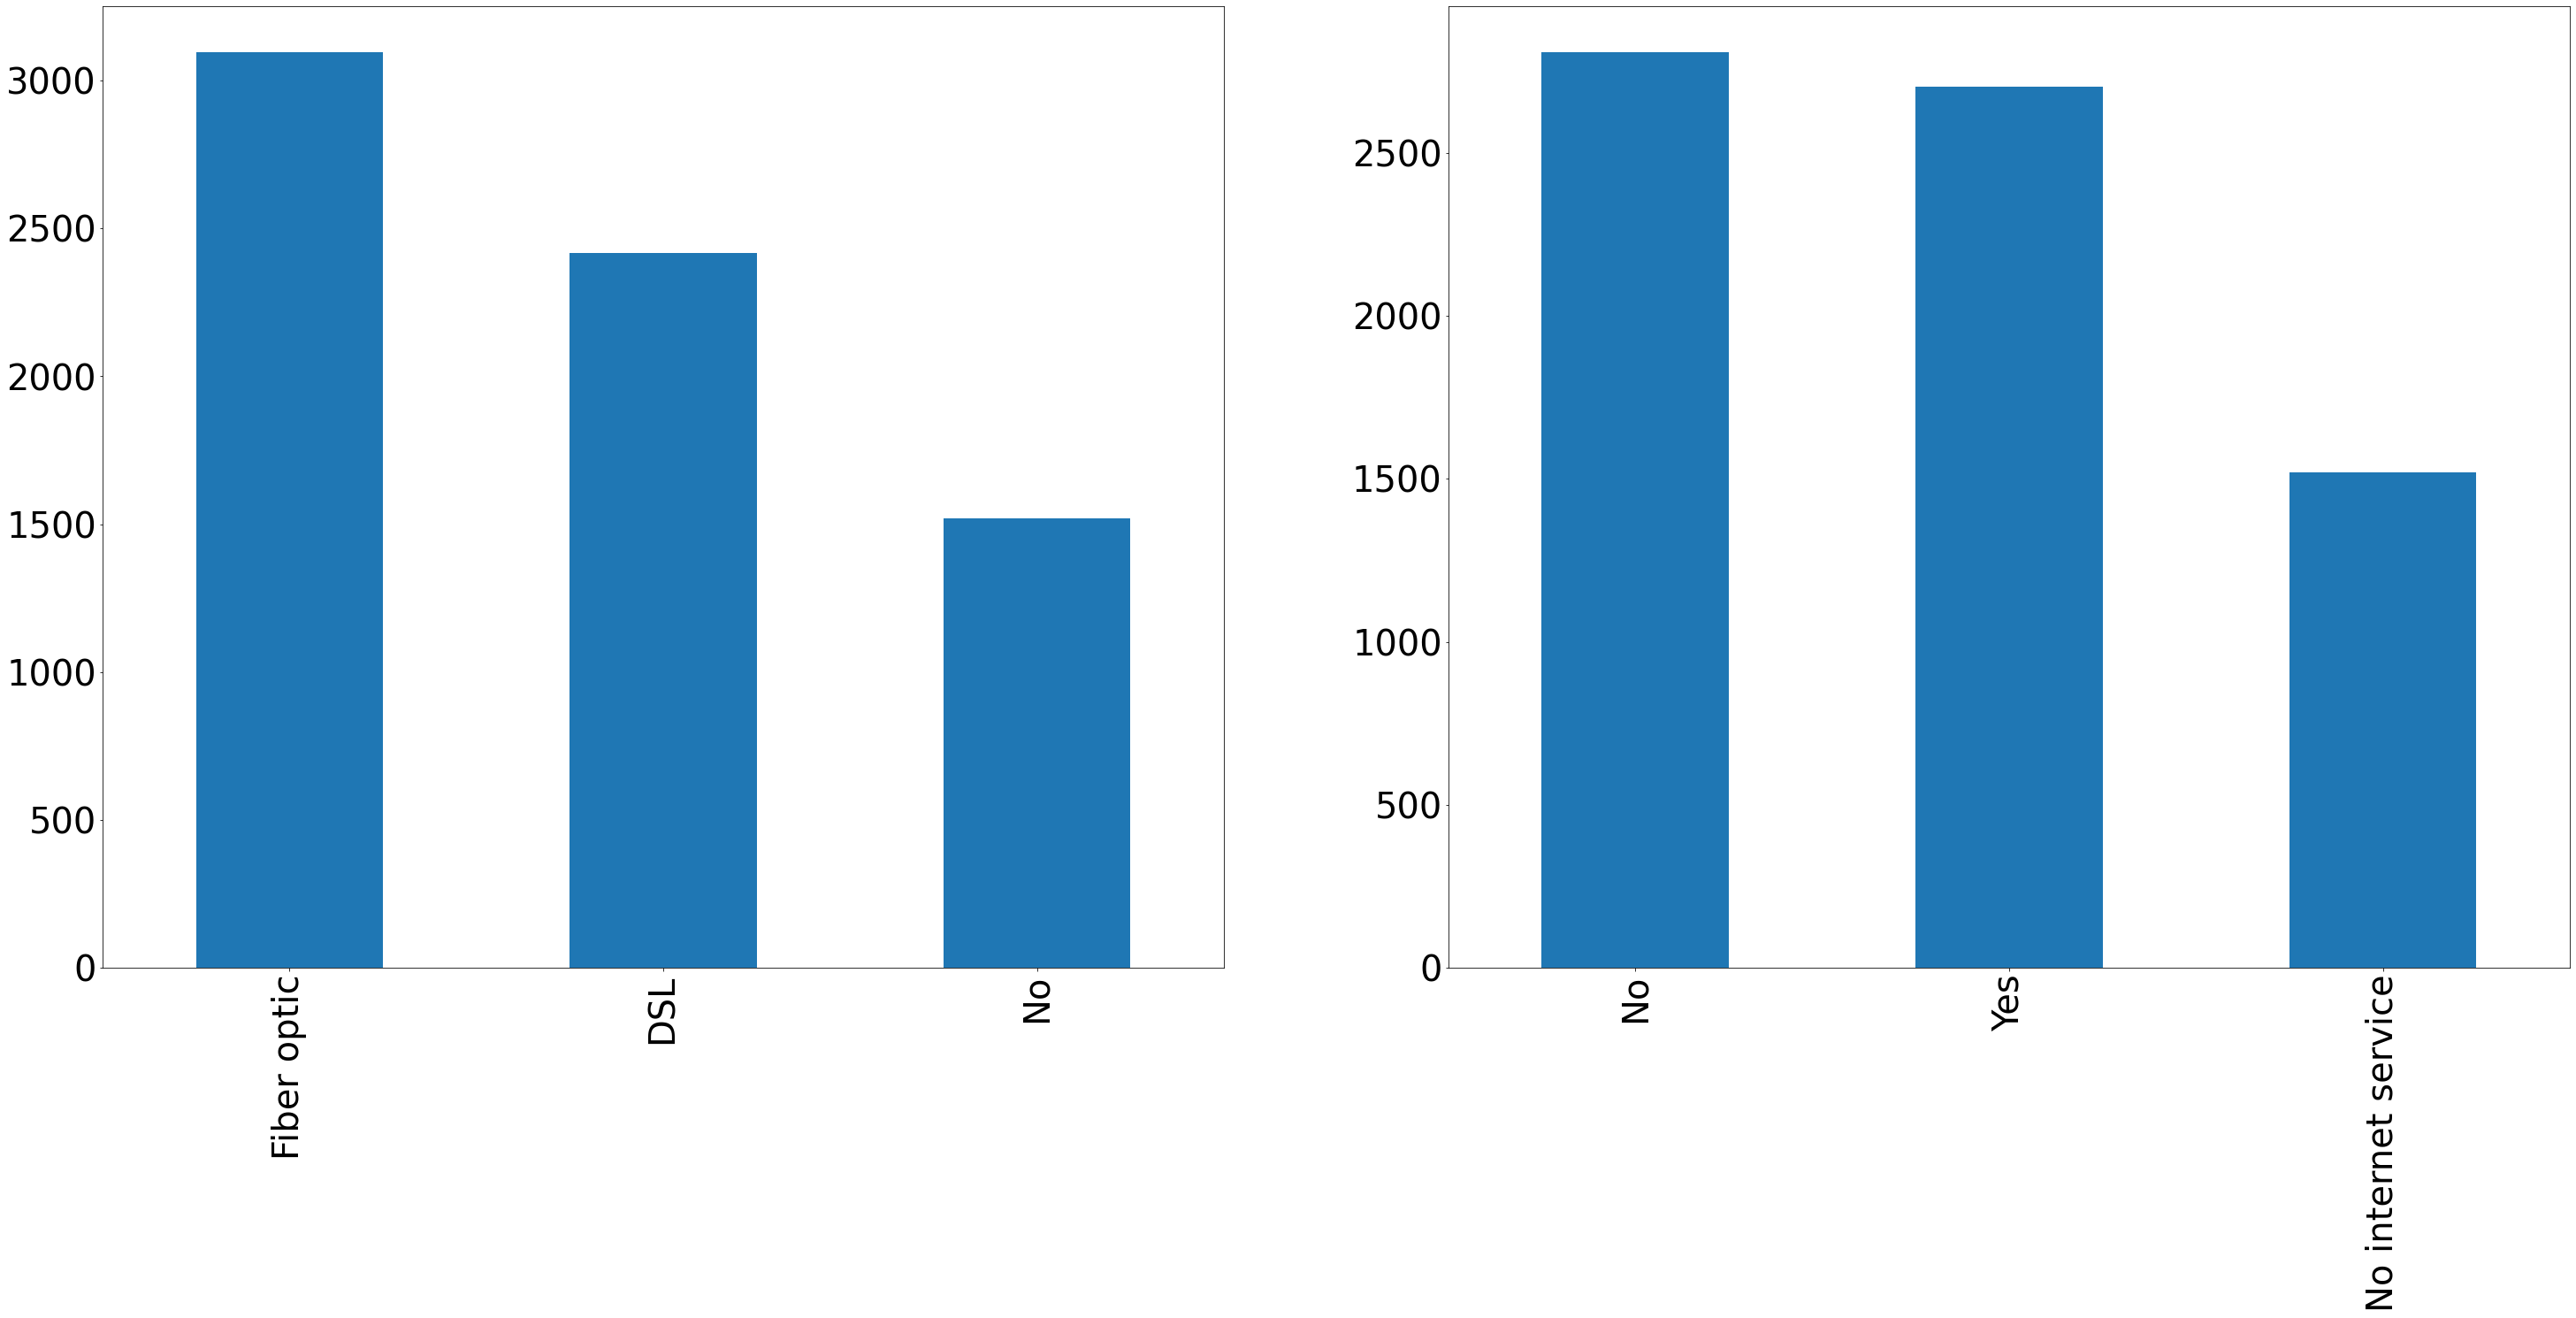

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df_services['InternetService'].value_counts().plot(kind='bar',fontsize=40, ax=ax1, figsize=(50,20))
df_services['StreamingService'].value_counts().plot(kind='bar',fontsize=40, ax=ax2, figsize=(50,20))

# a) Calculating the first metric: average revenue per user

In [25]:
df['AverageRevenue'] = df['MonthlyCharges']/df['TotalCharges']

### Let us check the Churn around the Average Revenue metrics

Text(0.5, 1.0, 'Distribution of Average Revenue by churn')

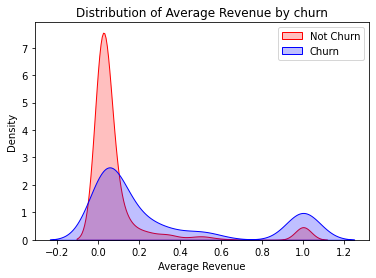

In [26]:
ax = sns.kdeplot(df.AverageRevenue[(df["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.AverageRevenue[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Average Revenue')
ax.set_title('Distribution of Average Revenue by churn')

Text(0.5, 1.0, 'Distribution of Total Charges by churn')

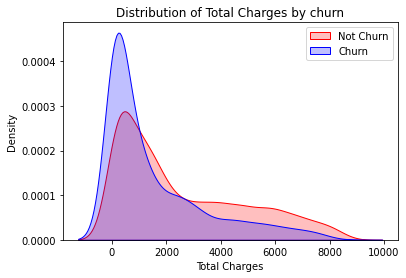

In [27]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by churn')

Text(0.5, 1.0, 'Distribution of Monthly Charges by churn')

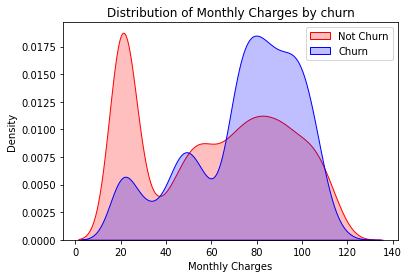

In [28]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by churn')

### From the above plots we can see that Higher % of customers churn when the monthly charges are high.
### There is higer churn when the total charges are lower
### Finally, we notice that the Average revenue generated by not churn customers is thrice that of customers who churn

### Finally, let us plot a Correlation plot with respect to target variable Churn to find the highly correlated columns with Churn

In [29]:
cor = df.corr()

In [30]:
#Correlation with target variable
cor_target = abs(cor["Churn"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

tenure            0.354049
Churn             1.000000
AverageRevenue    0.318539
Name: Churn, dtype: float64

### After going through the above EDA let us build some predictive models and compare them

In [31]:
df_dummies['AverageRevenue'] = df['AverageRevenue']

In [32]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [33]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [34]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [36]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8104265402843602


AxesSubplot(0.125,0.125;0.775x0.755)


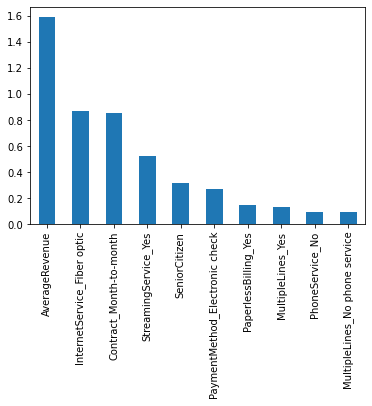

In [37]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


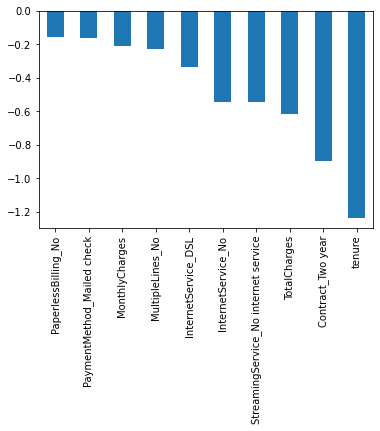

In [38]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

<p><b> Observations </b></p>
<p>We notice from the above plot that,there are some variables which have negative correlation with Churn and some have positive correlation. Negative relation means that likeliness of churn decreases with that variable.</p> 
 <p>- From the above plot we see that, as we saw in our EDA, having a 2 years contract reduces chances of churn. 2 years contract along with tenure have the most negative relation with Churn as predicted by logistic regression</p>
 <p>- Having DSL internet service also reduces the proability of Churn</p>
 <p>- Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. It could be because the quality of fiber optics provided by TalkTel is not upto the expectation of the customers.</p>

In [39]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


<AxesSubplot:>

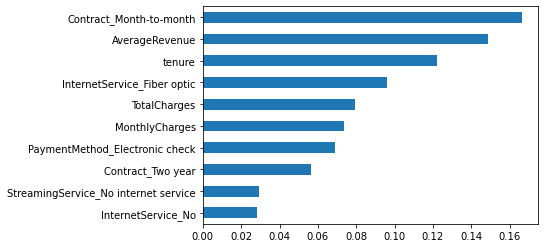

In [40]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

<p><b> Observations </b></p>
<p> - From the Random Forest algorithm, Month-to-Month contract, Average Revenue and tenure </p>
<p> - The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA </p>

In [41]:
#Trying to explore with Gradient Boosting Machine Algorithm

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gb = GradientBoostingClassifier()

In [44]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [45]:
y_pred = gb.predict(X_test)

In [46]:
print(metrics.accuracy_score(y_test, y_pred))

0.8081023454157783


In [47]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1052
           1       0.65      0.51      0.57       355

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.80      0.81      0.80      1407



<p> <b> Observations from accuracy report: </b> </p>
<p> - The precision and recall for No Churn is high as compared to Churn, as we have more data without Churn than Churn </p>
<p> - <b>macro avg:</b> <font color='red'><i> averaging the unweighted mean per label </i></font> is returning 75% precision 71% recall and 72% because of the skewness in the data</p>
<p> - <b> weighted avg: </b> <font color='red'><i> averaging the support-weighted mean per label </i></font> has returned 80% precision 81% recall and 80% f1-score</p>

#### Below is the confusion matrix of the same

In [48]:
print(metrics.confusion_matrix(y_test, y_pred))

[[956  96]
 [174 181]]


<font color='red'> <b> We see moderately high Type 2 Error because our dataset is skewed towards No churn<b/> <font/>